<a href="https://colab.research.google.com/github/Dhanasree-Rajamani/Data-Mining/blob/main/bodyPerformance_dataset_classification_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1


In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# New Section

In [2]:
from pycaret.utils import version
version()

'2.3.10'

In [41]:
from pycaret.datasets import get_data
import pandas as pd

In [42]:
file = ('bodyPerformance.csv')
  
data = pd.read_csv(file)
  
# displaying the contents of the XLSX file
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [43]:
!pip install Jinja2
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import jinja2

In [45]:
data.shape

(13393, 12)

In [46]:
data_set = data.sample(frac = 0.90, random_state=786)
data_unseen = data.drop(data_set.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace = True, drop = True)
print("data for modelling "+str(data_set.shape))
print("unseen data for predictions "+str(data_unseen.shape))

data for modelling (12054, 12)
unseen data for predictions (1339, 12)


In [48]:
from pycaret.classification import *
cluster1 = setup(data = data_set, target = 'class', session_id = 123)

,Description,Value
0,session_id,123
1,Target,class
2,Target Type,Multiclass
3,Label Encoded,"A: 0, B: 1, C: 2, D: 3"
4,Original Data,"(12054, 12)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [50]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7472,0.9195,0.7478,0.7533,0.7471,0.6629,0.6648,0.666
rf,Random Forest Classifier,0.7275,0.9107,0.7283,0.7318,0.7271,0.6367,0.6382,1.571
et,Extra Trees Classifier,0.7221,0.9045,0.7229,0.7265,0.7216,0.6294,0.6310,1.114
gbc,Gradient Boosting Classifier,0.7165,0.9048,0.7173,0.7238,0.7163,0.6219,0.6242,5.265
qda,Quadratic Discriminant Analysis,0.6531,0.8694,0.6541,0.6618,0.6550,0.5374,0.5385,0.028
dt,Decision Tree Classifier,0.6327,0.7549,0.6334,0.6350,0.6332,0.5102,0.5106,0.073
lr,Logistic Regression,0.6188,0.8500,0.6198,0.6173,0.6173,0.4918,0.4922,3.113
lda,Linear Discriminant Analysis,0.6188,0.8498,0.6198,0.6248,0.6208,0.4917,0.4922,0.036
ada,Ada Boost Classifier,0.5907,0.7263,0.5910,0.6036,0.5927,0.4541,0.4562,0.408
knn,K Neighbors Classifier,0.5523,0.7876,0.5530,0.5773,0.5531,0.4029,0.4076,0.146


INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [51]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [52]:
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [69]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6078,0.8486,0.6090,0.6102,0.6083,0.4771,0.4774
1,0.6220,0.8528,0.6234,0.6167,0.6190,0.4961,0.4963
2,0.6066,0.8419,0.6077,0.5999,0.6025,0.4756,0.4760
3,0.6315,0.8526,0.6323,0.6341,0.6315,0.5086,0.5093
4,0.6315,0.8515,0.6325,0.6355,0.6330,0.5086,0.5089
5,0.6031,0.8486,0.6042,0.6056,0.6040,0.4708,0.4709
6,0.6244,0.8568,0.6256,0.6158,0.6183,0.4993,0.5002
7,0.6358,0.8600,0.6366,0.6317,0.6327,0.5145,0.5151
8,0.5991,0.8442,0.5998,0.5994,0.5990,0.4653,0.4655


INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [53]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6517,0.7676,0.6524,0.6493,0.6497,0.5355,0.5360
1,0.6564,0.7706,0.6571,0.6624,0.6589,0.5417,0.5420
2,0.6209,0.7470,0.6216,0.6227,0.6211,0.4944,0.4947
3,0.6303,0.7532,0.6309,0.6400,0.6340,0.5070,0.5076
4,0.6528,0.7684,0.6538,0.6520,0.6521,0.5371,0.5373
5,0.6137,0.7423,0.6143,0.6224,0.6164,0.4849,0.4858
6,0.6197,0.7461,0.6205,0.6223,0.6205,0.4928,0.4931
7,0.6299,0.7531,0.6307,0.6310,0.6302,0.5065,0.5067
8,0.6097,0.7397,0.6105,0.6095,0.6091,0.4797,0.4800


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [54]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
create_app(dt)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as         age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
5854   23.0      F      161.4      53.52        23.5       79.0     109.0   
13018  27.0      M      180.3     102.40        32.8       78.0     134.0   
2376   27.0      M      172.2      69.40        14.1       96.0     144.0   
1624   37.0      F      164.8      72.70        31.4       52.0     101.0   
5405   33.0      M      177.7      82.76        18.2       86.0     148.0   
...     ...    ...        ...        ...         ...        ...       ...   
6206   25.0      M      170.9      73.40        20.2       83.0     123.0   
2110   34.0      M      171.2      88.50        27.4       81.0     149.0   
6781   49.0      M      156.6      64.60        31.0       88.0     146.0   
4042   61.0      F      153.8      52.30        28.0       80.0     124.0   
4

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://49649.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7feab10ff390>,
 'http://127.0.0.1:7861/',
 'https://49649.gradio.app')

In [56]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5972,0.8412,0.5980,0.6196,0.5932,0.4628,0.4703
1,0.6149,0.8445,0.6161,0.6179,0.6109,0.4866,0.4897
2,0.6303,0.8488,0.6313,0.6428,0.6281,0.5070,0.5118
3,0.6197,0.8542,0.6202,0.6434,0.6185,0.4926,0.4990
4,0.6149,0.8489,0.6160,0.6217,0.6014,0.4866,0.4955
5,0.6232,0.8494,0.6237,0.6322,0.6180,0.4975,0.5027
6,0.6386,0.8567,0.6393,0.6642,0.6375,0.5180,0.5252
7,0.6240,0.8523,0.6251,0.6373,0.6140,0.4987,0.5094
8,0.6346,0.8483,0.6350,0.6489,0.6324,0.5127,0.5176


INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 5
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [57]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')


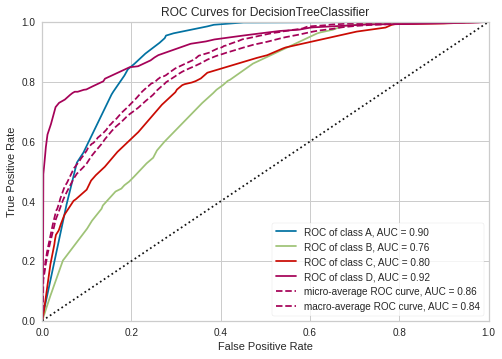

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [58]:
plot_model(tuned_dt, plot = 'auc')

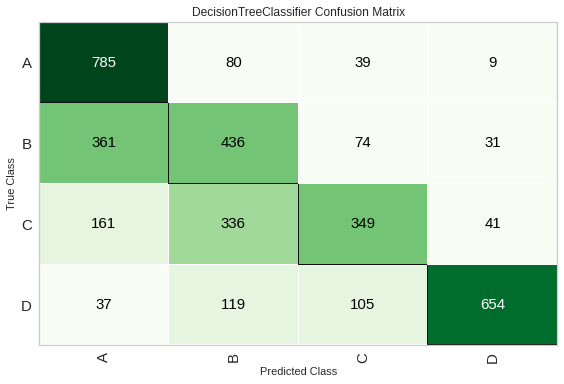

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [77]:
plot_model(tuned_dt, plot = 'confusion_matrix')

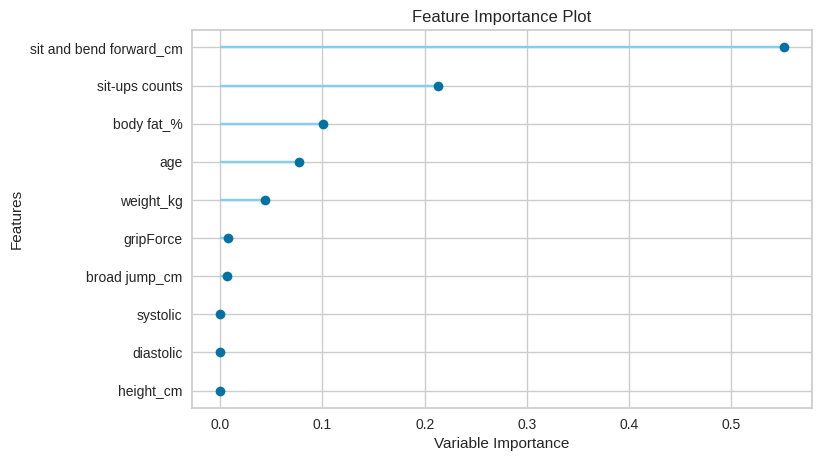

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [78]:
plot_model(tuned_dt, plot='feature')

In [79]:
best = automl(optimize = 'Recall')
best

INFO:logs:Initializing automl()
INFO:logs:automl(optimize=Recall, use_holdout=False, return_train_score=False)
INFO:logs:Model Selection Basis : CV Results on Training set
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, round=4, cross_validation=False, predict=False, fit_kwargs=None, groups=None, refit=True, verbose=False, system=False, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking e

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [80]:
pred_body_perf = predict_model(tuned_dt, data = data_unseen)
pred_body_perf

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.0,0.8577,0,0,0,0,0


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,Label,Score
0,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B,B,0.4711
1,26.0,M,169.2,70.60,21.0,63.0,129.0,41.3,15.1,53.0,225.0,B,A,0.4970
2,31.0,M,177.5,79.50,23.0,90.0,148.0,51.2,18.4,62.0,208.0,A,B,0.3636
3,27.0,M,177.6,79.70,22.8,59.0,108.0,48.0,1.8,59.0,219.0,D,D,0.9971
4,58.0,F,146.5,46.40,32.9,71.0,127.0,18.7,17.4,20.0,111.0,C,B,0.4701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,28.0,F,157.3,67.44,27.8,61.0,125.0,32.2,27.4,43.0,157.0,A,A,0.7261
1335,21.0,F,163.9,60.10,31.1,81.0,119.0,27.8,24.2,30.0,173.0,B,B,0.4711
1336,60.0,M,173.0,71.30,18.3,93.0,154.0,34.5,2.7,33.0,149.0,C,C,0.7297
1337,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,D,1.0000


In [81]:
save_model(tuned_dt,'Final Decission tree for Body performance classification Model')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), model_name=Final Decission tree for Body performance classification Model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                    

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='entropy', max_depth=6,
                        

In [82]:
save_dt_model = load_model('Final Decission tree for Body performance classification Model')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=Final Decission tree for Body performance classification Model, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [83]:
new_prediction = predict_model(save_dt_model, data = data_unseen)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        cr

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.0,0.8577,0,0,0,0,0


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,Label,Score
0,36.0,F,165.4,55.4,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B,B,0.4711
1,26.0,M,169.2,70.6,21.0,63.0,129.0,41.3,15.1,53.0,225.0,B,A,0.4970
2,31.0,M,177.5,79.5,23.0,90.0,148.0,51.2,18.4,62.0,208.0,A,B,0.3636
3,27.0,M,177.6,79.7,22.8,59.0,108.0,48.0,1.8,59.0,219.0,D,D,0.9971
4,58.0,F,146.5,46.4,32.9,71.0,127.0,18.7,17.4,20.0,111.0,C,B,0.4701


In [84]:
from pycaret.utils import check_metric
check_metric(new_prediction['class'], new_prediction['Label'], metric = 'Accuracy')

0.6355